In [1]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133
2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639
2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787
2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960
2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104


^C


In [3]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date.strftime('%A')

'Saturday'

In [5]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [6]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [7]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [8]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [13]:
# indexing by time in pandas
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [14]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [15]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

# pandas time series data structures
## the fundamental Pandas data structures for working with time series data

 - `Timestamp`
 - `Period`
 - `Timedelta`
    - Timedelta is based on numpy.timedelta64, more efficient replacement for `datetime.timedelta`

In [17]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [18]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [19]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [20]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
# hourly timestamps
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [23]:
# monthly timestamps
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [24]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

##  Frequencies and offsets
Fundamental to these Pandas time series tools is the concept of a frequency or date offset. Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available:

| Code |	Description | Code | Description |
| --: | --: | --: | --: |
| `D` |	Calendar day | `B` | Business day |
| `W` |	Weekly | | |
| `M` |	Month end  | `BM`	| Business month end |
| `Q` |	Quarter end | `BQ` | Business quarter end |
| `A` |	Year end |	`BA` |Business year end |
| `H` |	Hours | `BH` | Business hours |
| `T` |	Minutes | | |
| `S` |	Seconds | | |
| `L` |	Milliseonds | | |
| `U` |	Microseconds | | |
| `N` |	nanoseconds | | |

In [25]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')


| Code | Description | Code | Description |
| --: | --: | --: | --: |
| `MS` | Month start | `BMS` | Business month start |
| `QS` | Quarter start | `BQS` | Business quarter start |
| `AS` | Year start | `BAS` | Business year start |

In [27]:
# For a frequency of 2h, 30 min, combine the frequencies as follows!
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [28]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling Shifting, and Windowing

In [41]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133
2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639
2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787
2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960
2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn
# seaborn.set()

import sys


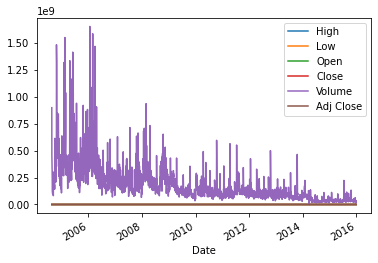

In [43]:
goog.plot();

## Resampling and converting frequencies

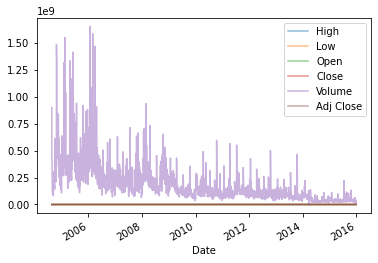

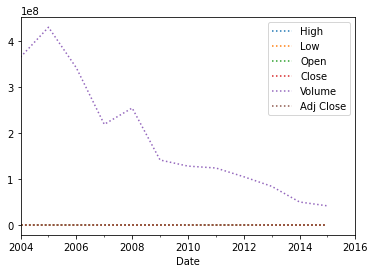

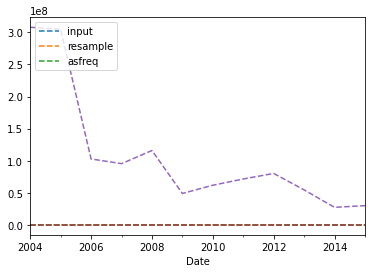

In [44]:
goog.plot(alpha=0.5,style='-');
goog.resample('BA').mean().plot(style=':');
goog.asfreq('BA').plot(style='--');
plt.legend(['input','resample','asfreq'], loc = 'upper left')
plt.show()

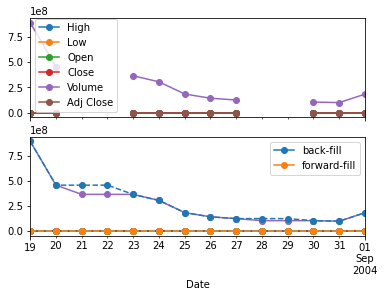

In [45]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

## Time Shifts

C:\Users\thowe\AppData\Local\Temp\ipykernel_57784\452183247.py:9: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


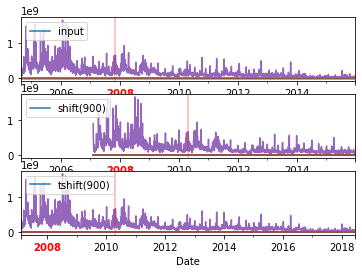

In [46]:
fig, ax = plt.subplots(3, sharey=True)


# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

C:\Users\thowe\AppData\Local\Temp\ipykernel_57784\2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


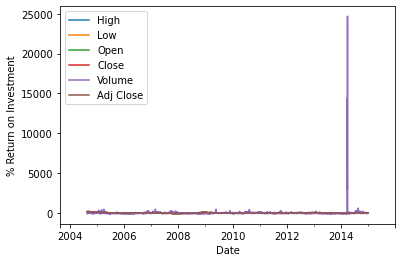

In [47]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

## Rolling Windows

In [48]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

ValueError: If using all scalar values, you must pass an index

## Visualizing Seattle Bicycle Counts

In [49]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  111k    0  111k    0     0   106k      0 --:--:--  0:00:01 --:--:--  106k
100 1758k    0 1758k    0     0   864k      0 --:--:--  0:00:02 --:--:--  864k
100 3470k    0 3470k    0     0  1143k      0 --:--:--  0:00:03 --:--:-- 1143k
100 4743k    0 4743k    0     0  1249k      0 --:--:--  0:00:03 --:--:-- 1250k


In [50]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [53]:
data.columns = ['Total','West', 'East']
data['Total'] = data.eval('West + East')

In [54]:
data.dropna().describe()

,Total,West,East
count,152342.000000,152342.000000,152342.000000
mean,109.618044,49.611164,60.006879
std,139.253774,64.002665,86.500997
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,145.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


In [55]:
import seaborn as sns; sns.set()

Text(0, 0.5, 'Hourly Bicycle Count')

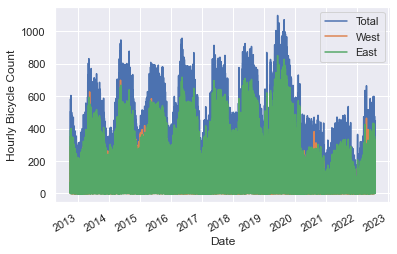

In [56]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

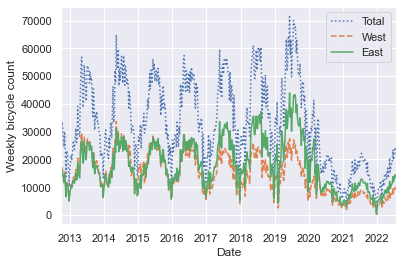

In [57]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

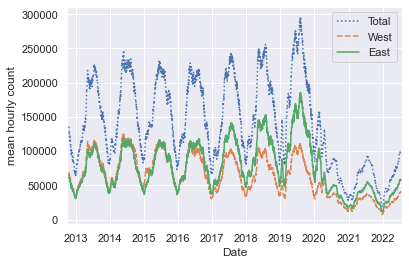

In [58]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

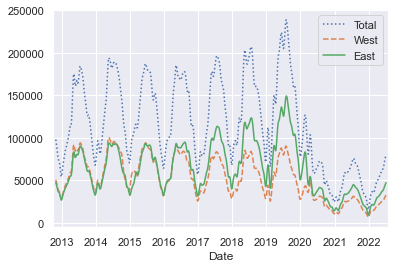

In [59]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

## Digging into the data

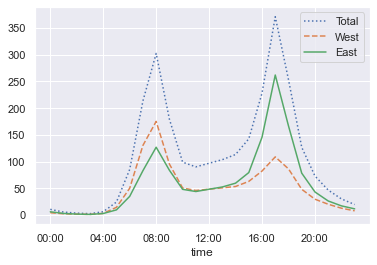

In [61]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

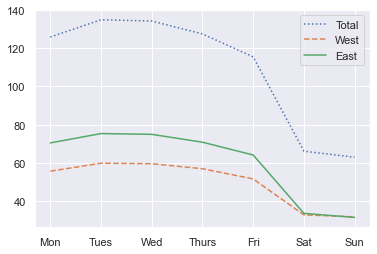

In [62]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [63]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend,data.index.time]).mean()

AttributeError: 'DataFrame' object has no attribute 'ix'

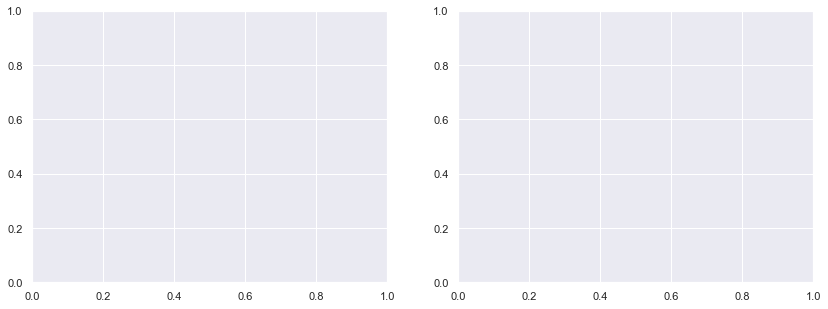

In [64]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0],title='Weekdays',
                                 xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);